In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from AutoClass import AutoClassImpute,take_norm,find_hv_genes
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

2023-05-29 20:22:24.333386: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
expr = pd.read_csv('counts.csv',index_col=0)
X = expr.values

In [4]:
expr.shape

(500, 938)

In [5]:
expr

,Gene2,Gene3,Gene5,Gene6,Gene7,Gene8,Gene9,Gene10,Gene11,Gene12,...,Gene991,Gene992,Gene993,Gene994,Gene995,Gene996,Gene997,Gene998,Gene999,Gene1000
Cell1,0,11,26,0,20,12,0,0,21,0,...,24,0,8,457,72,13,22,21,34,23
Cell2,0,21,20,27,12,0,0,0,23,51,...,54,20,17,656,49,29,25,35,0,26
Cell3,12,16,24,15,18,13,0,3,24,36,...,48,11,0,482,21,17,13,19,28,19
Cell4,15,21,17,21,24,14,0,0,41,0,...,64,0,0,630,52,0,31,52,27,43
Cell5,24,37,22,71,10,46,0,0,45,48,...,37,0,11,677,102,32,41,29,29,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cell496,14,42,16,36,26,0,0,8,27,49,...,34,0,11,721,81,34,23,37,41,43
Cell497,0,20,0,11,26,19,5,0,13,33,...,60,37,0,491,62,25,18,71,16,35
Cell498,0,21,0,26,0,11,0,0,0,50,...,48,6,0,634,70,29,24,24,40,0
Cell499,0,23,13,36,28,14,0,0,56,19,...,50,0,9,689,83,17,32,27,21,35


In [5]:
res = AutoClassImpute(X)
imp = res['imp']

500 cells and 938 genes
number of clusters in pre-clustering:[8, 9, 10]
n_cluster = 8...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2023-05-29 19:19:40.821952: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


16/16 [==============================] - 0s 1ms/step
n_cluster = 9...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16/16 [==============================] - 0s 1ms/step
n_cluster = 10...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


16/16 [==============================] - 0s 1ms/step
escape time is: 35.21527123451233


In [6]:
PCA_imp = PCA(n_components=50).fit_transform(imp)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

Text(0, 0.5, 'tSNE2')

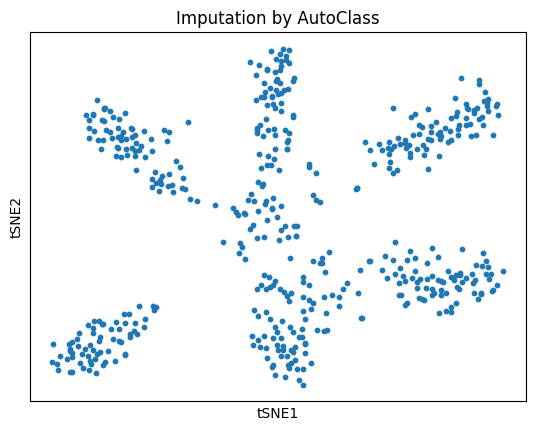

In [7]:
plt.scatter(tsne_imp[:, 0], tsne_imp[:, 1], s=10)
plt.title('Imputation by AutoClass')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

In [2]:
import scanpy as sc
ad = sc.read_h5ad("data/SEAAD_MTG_RNAseq_final-nuclei.2023-05-05.h5ad", backed="r")

In [3]:
import h5py
f = h5py.File("data/SEAAD_MTG_RNAseq_final-nuclei.2023-05-05.h5ad")

obs = pd.DataFrame()
for i in f["obs"].keys():
    #print(i)
    if i not in ["Hispanic", "Race (choice=American Indian", "Race (choice=Black", "__categories"]:
        obs[i] = np.array(f["obs"][i])

/tmp/ipykernel_745493/2794323756.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  obs[i] = np.array(f["obs"][i])
/tmp/ipykernel_745493/2794323756.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  obs[i] = np.array(f["obs"][i])
/tmp/ipykernel_745493/2794323756.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = 

In [4]:
import anndata

min_genes_per_cell = 200 # Filter out cells with fewer genes than this expressed 
max_genes_per_cell = 6000 # Filter out cells with more genes than this expressed

set_cells = list()
chunk_size = 2000
for chunk, start, end in ad.chunked_X(chunk_size):
    adata = anndata.AnnData(chunk)
    obs = obs[:chunk_size]
    adata.obs = obs
    print(adata.shape)
    sc.pp.filter_cells(adata, min_genes=min_genes_per_cell, inplace=True)
    sc.pp.filter_cells(adata, max_genes=max_genes_per_cell, inplace=True)
    print(adata.shape)
    sc.pp.highly_variable_genes(adata, inplace=True)
    adata = adata[:, adata.var.highly_variable]
    #print(adata[adata.obs["highly_variable"] == True])
    print(adata.shape)
    break

Y = adata.obs["Subclass"] #cell type label
unique_class = np.unique(Y)
KK = len(unique_class) 


(2000, 36601)
(1158, 36601)


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_simple.py:140: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adata.obs['n_genes'] = number
/usr/local/lib/python3.8/dist-packages/anndata/_core/anndata.py:117: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


(1158, 5614)


In [5]:
X = adata.X.toarray()

In [6]:
del ad

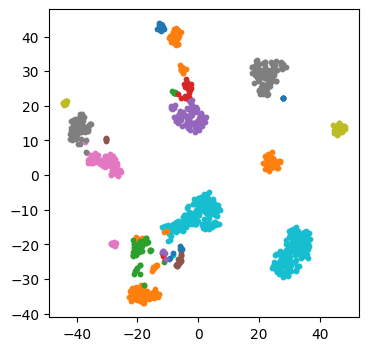

In [13]:
X_norm = take_norm(X)

PCA_raw = PCA(n_components=50).fit_transform(X_norm)
tsne_raw = TSNE(n_components=2).fit_transform(PCA_raw)

fig = plt.figure(figsize=(4,4))
for i in range(KK):
    plt.scatter(tsne_raw[Y==unique_class[i],0],
                tsne_raw[Y==unique_class[i],1], 
                s=10,label = unique_class[i] )

In [14]:
res = AutoClassImpute(X, num_cluster=KK)
imp = res['imp']

1158 cells and 5614 genes
number of clusters in pre-clustering:[21, 22, 23]
n_cluster = 21...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37/37 [==============================] - 0s 2ms/step
n_cluster = 22...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37/37 [==============================] - 0s 2ms/step
n_cluster = 23...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


37/37 [==============================] - 0s 1ms/step
escape time is: 53.51564621925354


Text(0, 0.5, 'tSNE2')

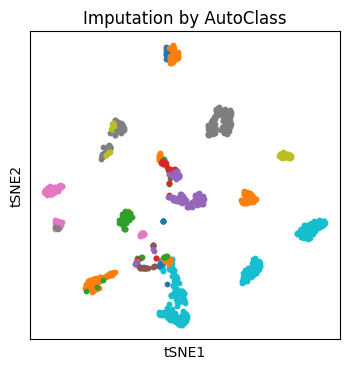

In [15]:
PCA_imp = PCA(n_components=50).fit_transform(imp)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

fig = plt.figure(figsize=(4,4))
for i in range(KK):
    plt.scatter(tsne_imp[Y==unique_class[i],0],
                tsne_imp[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by AutoClass')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pytorch_lightning as pl
import time
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:
def take_norm(self, data, cellwise_norm=True, log1p=True):
    data_norm = data.copy()
    data_norm = data_norm.astype('float32')
    if cellwise_norm:
        libs = data.sum(axis=1)
        norm_factor = np.diag(np.median(libs) / libs)
        data_norm = np.dot(norm_factor, data_norm)

    if log1p:
        data_norm = np.log2(data_norm + 1.)
    return data_norm
    
def find_hv_genes(self, X, top=1000):
    ngene = X.shape[1]
    CV = []
    for i in range(ngene):
        x = X[:, i]
        x = x[x != 0]
        mu = np.mean(x)
        var = np.var(x)
        CV.append(var / mu)
    CV = np.array(CV)
    rank = CV.argsort()
    hv_genes = np.arange(len(CV))[rank[:-1 * top - 1:-1]]
    return hv_genes

class AutoClass(nn.Module):
    def __init__(self):
        super(AutoClass, self).__init__()
        self.encoder_layer_size = [128]
        self.input_data = None
        self.ncell = 0
        self.ngene = 0
        self.input_layer = None
        self.neck_layer = None
        self.decode_layer = None
        self.classifier_layer = None
        self.dropout_rate = 0
        self.epochs = 300
        self.classifier_weight = 0
        self.n_clusters = 0
        self.n_classes = 0
        self.dummy_label = None
        self.imp = 0
        self.reg = 0
        self.npc = 0
        self.batch_size = 32
        self.his = None
        self.early_stopping = 30
        self.reduce_lr = 15
        self.verbose = 0
        self.lr = 0.001
        
        self.len_layer = len(self.encoder_layer_size)
        
    def set_encoder_layer_size(self, size):
        self.encoder_layer_size = size
        self.len_layer = len(self.encoder_layer_size)
    
    def set_input_data(self, input_data):
        self.input_data = input_data.astype("float32")
        self.ncell = input_data.shape[0]
        self.ngene = input_data.shape[1]
        
    def set_dropout_rate(self, dropout_rate):
        self.dropout_rate = dropout_rate
    
    def set_epochs(self, epochs):
        self.epochs = epochs
        
    def set_classifier_weight(self, w):
        self.classifier_weight = w
    
    def set_n_clusters(self, k):
        self.n_clusters = k
        
    def set_n_classes(self, n):
        self.n_classes = n
        
    def set_reg(self, reg):
        self.reg = reg
        
    def set_truelabel(self, truelabel):#needs further building
        n = len(truelabel)
        assert n == self.ncell, "length of true label should equal to number of cells"
        labelid = pd.factorize(truelabel)[0]
        
    def set_npc(self, npc):
        assert npc <= min((self.ncell, self.ngene)), "number of PCs should not exceed number of genes or cells"
        self.npc = npc
    
    def set_batch_size(self, batch_size):
        self.batch_size = batch_size
        
    def set_early_stopping(self, es):
        self.early_stopping = es
        
    def set_reduce_lr(self, reduce_lr):
        self.reduce_lr = reduce_lr
        
    def set_verbose(self, verbose):
        self.verbose = verbose
        
    def set_lr(self, lr):
        self.lr = lr
        
    def _create_model(self):
        
        #encoder
        self.encoders = nn.Sequential()
        self.encoders.add_module("input_layer", nn.Linear(self.ngene, self.encoder_layer_size[0]))
        self.encoders.add_module("input_activation", nn.ReLU())
        for i in range(self.len_layer-1):
            self.encoders.add_module("encoder_layer" + str(i+1), nn.Linear(self.encoder_layer_size[i], self.encoder_layer_size[i+1]))
            self.encoders.add_module("encoder_activation" + str(i+1), nn.ReLU())
        
        #bottleneck
        self.bottleneck_dropout = nn.Dropout(self.dropout_rate)
        if False:#len(self.encoder_layer_size) > 1:
            self.bottleneck_layer = nn.Linear(self.encoder_layer_size[-2], self.encoder_layer_size[-1])
        else:
            self.bottleneck_layer = nn.Linear(self.encoder_layer_size[-1], self.encoder_layer_size[-1])
        self.bottleneck_activation = nn.ReLU()
        
        #decoder
        self.decoders = nn.Sequential()
        for i in reversed(range(self.len_layer-1)):
            self.decoders.add_module("decoder_layer" + str(i+1), nn.Linear(self.encoder_layer_size[i+1], self.encoder_layer_size[i]))
            self.decoders.add_module("decoder_activation" + str(i+1), nn.ReLU())
        self.decoders.add_module("output_layer", nn.Linear(self.encoder_layer_size[0], self.ngene))
        self.decoders.add_module("output_activation", nn.Softplus())
        
        #classifier
        self.classifier_layer = nn.Linear(self.encoder_layer_size[-1], self.n_clusters)
        self.classifier_activation = nn.Softmax(dim=-1)
        
    def to_categorical(self, y, num_classes):
        """ 1-hot encodes a tensor """
        return np.eye(num_classes, dtype='uint8')[y]
        
    def cluster(self):
        if self.n_clusters > 1:
            n = np.min((self.ncell, self.ngene))
            pca = PCA(n_components=n)
            pcs = pca.fit_transform(self.input_data)
            var = (pca.explained_variance_ratio_).cumsum()
            npc_raw = (np.where(var > 0.7))[0].min()  # number of PC used in K-means
            if npc_raw > self.npc:
                npc_raw = self.npc
            pcs = pcs[:, :npc_raw]
            # K-means clustering on PCs
            kmeans = KMeans(n_clusters=self.n_clusters, random_state=1).fit(StandardScaler().fit_transform(pcs))
            clustering_label = kmeans.labels_
            self.dummy_label = self.to_categorical(y=clustering_label, num_classes=len(np.unique(clustering_label)))
    
    def forward(self, x):
        #input and encoder layer
        x = self.encoders(x)
        
        #bottleneck
        x = self.bottleneck_dropout(x)
        x = self.bottleneck_activation(self.bottleneck_layer(x))
        
        #decoder and output layer
        x_imp = self.decoders(x)
        
        #classifier layer
        x_classified =self.classifier_activation(self.classifier_layer(x))
        
        return x_imp, x_classified

In [16]:
class AutoClassImpute(object):
    def __init__(self, cellwise_norm=True, log1p=True, num_clusters=9, num_classes=2):
        super(AutoClassImpute, self).__init__()
        self.cellwise_norm = cellwise_norm
        self.log1p = log1p
        self.num_clusters = num_clusters
        self.num_classes = num_classes
        self.encoder_layer_size=[128]
        
        self.AC = AutoClass()
        
    def create_model(self, data, encoder_layer_size=[1000, 500, 250], dropout_rate=0.1, classifier_weight=0.9, truelabel=[], reg=0.000, batch_size=32, epochs=300, verbose=False, npc=15, es=30, reduce_lr=15, lr=0.001):
        self.AC.set_input_data(data)
        self.AC.set_dropout_rate(dropout_rate)
        self.AC.set_lr(lr)
        self.AC.set_encoder_layer_size(encoder_layer_size)
        self.AC.set_batch_size(batch_size)
        self.AC.set_verbose(verbose)
        self.AC.set_npc(npc)
        self.AC.set_early_stopping(es)
        self.AC.set_reduce_lr(reduce_lr)
        self.AC.set_reg(reg)
        self.AC.set_classifier_weight(classifier_weight)
        self.ncell = self.AC.ncell
        self.ngene = self.AC.ngene
        
        self.AC._create_model()
        
    def work(self, x, y=None):
        imps = np.zeros((self.ncell, self.ngene))
        
        if type(self.num_clusters) == int:
            num_cluster = [np.max((1,self.num_clusters-1)),self.num_clusters, self.num_clusters+1]
        else:
            num_cluster = self.num_clusters
        print('number of clusters in pre-clustering:{}'.format(self.num_clusters))
        for n_cluster in num_cluster:
            print('n_cluster = {}...'.format(n_cluster))
            self.AC.set_n_clusters(n_cluster)
            self.AC.cluster()
            self.create_model(x)
            imp = self.train(x)
            imps = imps + imp
        imps = imps/3
        return imps
            
        
        
    def train(self, x, y=None):
        
        criterion_decoder = nn.MSELoss().to(device)
        criterion_classifier = nn.CrossEntropyLoss().to(device)

        optimizer = optim.Adam(self.AC.parameters(), lr=self.AC.lr)
        
        input_data = self.AC.input_data
        cluster_labels = self.AC.dummy_label

        train_data = []
        for i in range(len(input_data)):
            train_data.append([input_data[i], cluster_labels[i]])

        trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=self.AC.batch_size)
        for epoch in range(self.AC.epochs):
            self.AC.to(device)
            for inp_data, labels in trainloader:
                optimizer.zero_grad()
                out_imp, out_classified = self.AC(inp_data.to(device))
                loss_imp = criterion_decoder(out_imp, inp_data.to(device))
                #loss_clusters = criterion_classifier(out_classified.to(torch.float), labels.to(device).to(torch.float))
                loss_clusters = nn.NLLLoss().to(device)(torch.log(out_classified), labels.to(device).argmax(-1))
                loss = (1 - self.AC.classifier_weight) * loss_imp + self.AC.classifier_weight * loss_clusters
                loss.backward()
                optimizer.step()
        imp = []
        with torch.no_grad():
            for inp_data, labels in trainloader:
                optimizer.zero_grad()
                out_imp, out_classified = self.AC(inp_data.to(device))
                imp.extend(out_imp.cpu().numpy())
        imp = np.array(imp)
        return imp
        
        
        

In [17]:
auto = AutoClassImpute(num_clusters=KK)
auto.create_model(X)
imps = auto.work(X)

/usr/local/lib/python3.8/dist-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


number of clusters in pre-clustering:22
n_cluster = 21...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster = 22...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


n_cluster = 23...


/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'tSNE2')

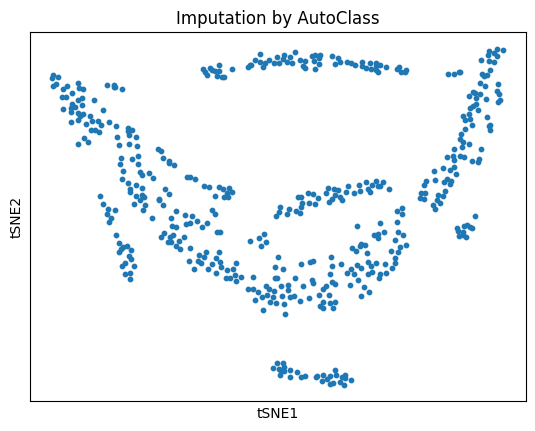

In [135]:
PCA_imp = PCA(n_components=50).fit_transform(imps)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

plt.scatter(tsne_imp[:, 0], tsne_imp[:, 1], s=10)
plt.title('Imputation by AutoClass')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

In [18]:
PCA_imp = PCA(n_components=50).fit_transform(imps)
tsne_imp = TSNE(n_components=2).fit_transform(PCA_imp)

fig = plt.figure(figsize=(4,4))
for i in range(KK):
    plt.scatter(tsne_imp[Y==unique_class[i],0],
                tsne_imp[Y==unique_class[i],1], 
                s=10,label = unique_class[i] ) 
plt.title('Imputation by AutoClass')
plt.xticks([],[])
plt.yticks([],[])
plt.xlabel('tSNE1')
plt.ylabel('tSNE2')

ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values